In [41]:
from time import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from tools.common_methods import get_train_test_data, print_results

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
xgb_regressor = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=5000, seed=1)
xgb_regressor.fit(X_train_std, y_train)

y_pred = xgb_regressor.predict(X_test_std)
print_results(y_test, y_pred)

MSE: 36.07873131866384 	R2 score: 0.9767486493855142


In [9]:
results_df = pd.DataFrame(columns=['Amount of components', 'MSE', 'R2 Score'])
for n_components in range(1, 25):
    start = time()
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    xgb_regressor = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=5000, seed=1)
    xgb_regressor.fit(X_train_pca, y_train)

    y_pred = xgb_regressor.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_df = results_df.append({'Amount of components': n_components, 'MSE': mse, 'R2 Score': r2},
                                   ignore_index=True)

    print(n_components, '- time for the round:', time() - start)

1 - time for the round: 19.782588958740234
2 - time for the round: 24.410315990447998
3 - time for the round: 29.112589836120605
4 - time for the round: 30.45351767539978
5 - time for the round: 31.367850303649902
6 - time for the round: 32.76215219497681
7 - time for the round: 35.434897899627686
8 - time for the round: 34.90953826904297
9 - time for the round: 50.798213958740234
10 - time for the round: 52.979037046432495
11 - time for the round: 54.71054744720459
12 - time for the round: 56.11065220832825
13 - time for the round: 58.21904444694519
14 - time for the round: 58.51058864593506
15 - time for the round: 60.35971188545227
16 - time for the round: 62.796066761016846
17 - time for the round: 77.5610466003418
18 - time for the round: 78.5906126499176
19 - time for the round: 80.30671763420105
20 - time for the round: 81.35727119445801
21 - time for the round: 83.0016553401947
22 - time for the round: 85.53673934936523
23 - time for the round: 88.00114560127258
24 - time for t

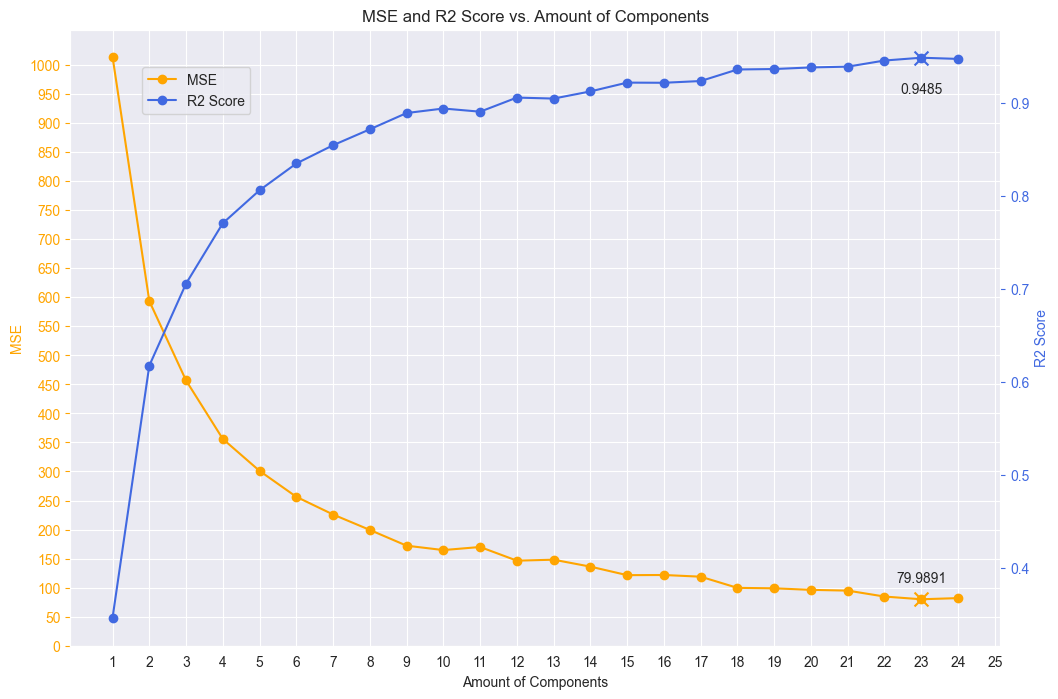

In [105]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

mse_color = 'orange'
best_mse = results_df.loc[results_df['MSE'].idxmin()]
mse_line, = ax1.plot(results_df['Amount of components'], results_df['MSE'], marker='o', label='MSE', color=mse_color)
ax1.scatter(best_mse['Amount of components'], best_mse['MSE'], color=mse_color, s=100, marker='x', label=f'Best MSE: {best_mse["MSE"]:.4f}', zorder=5)
ax1.annotate(f'{best_mse["MSE"]:.4f}', xy=(23, 110), ha='center')

ax1.set_xlabel('Amount of Components')
ax1.set_ylabel('MSE', color=mse_color)
ax1.tick_params('y', colors=mse_color)
ax1.set_yticks(range(0, 1001, 50))

r2_color = 'royalblue'
best_r2 = results_df.loc[results_df['R2 Score'].idxmax()]
r2_line, = ax2.plot(results_df['Amount of components'], results_df['R2 Score'], marker='o', label='R2 Score', color=r2_color)
ax2.scatter(best_r2['Amount of components'], best_r2['R2 Score'], color=r2_color, s=100, marker='x', label=f'Best R2 Score: {best_r2["R2 Score"]:.4f}', zorder=5)
ax2.annotate(f'{best_r2["R2 Score"]:.4f}', xy=(23, 0.91), ha='center')

ax2.set_ylabel('R2 Score', color=r2_color)
ax2.tick_params('y', colors=r2_color)

lines = [mse_line, r2_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, bbox_to_anchor=(0.07, 0.95))
ax1.grid(True)
ax2.grid(False)

plt.title('MSE and R2 Score vs. Amount of Components')
plt.xticks(range(1, 26))
plt.show()

Перетворення фічей на головні компоненти не призвело до покращення результатів.
Для наочності виведемо кореляцію головних компонент з оригінальними фічами при стисненні до різних розмірностей.

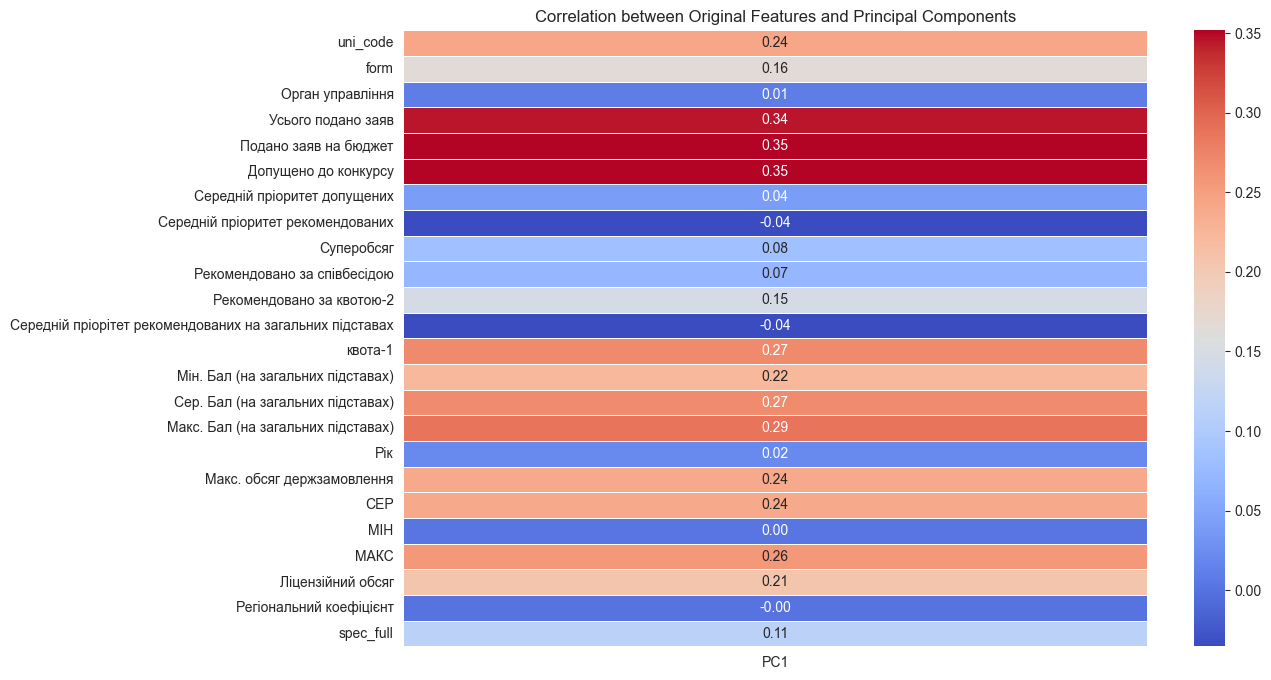

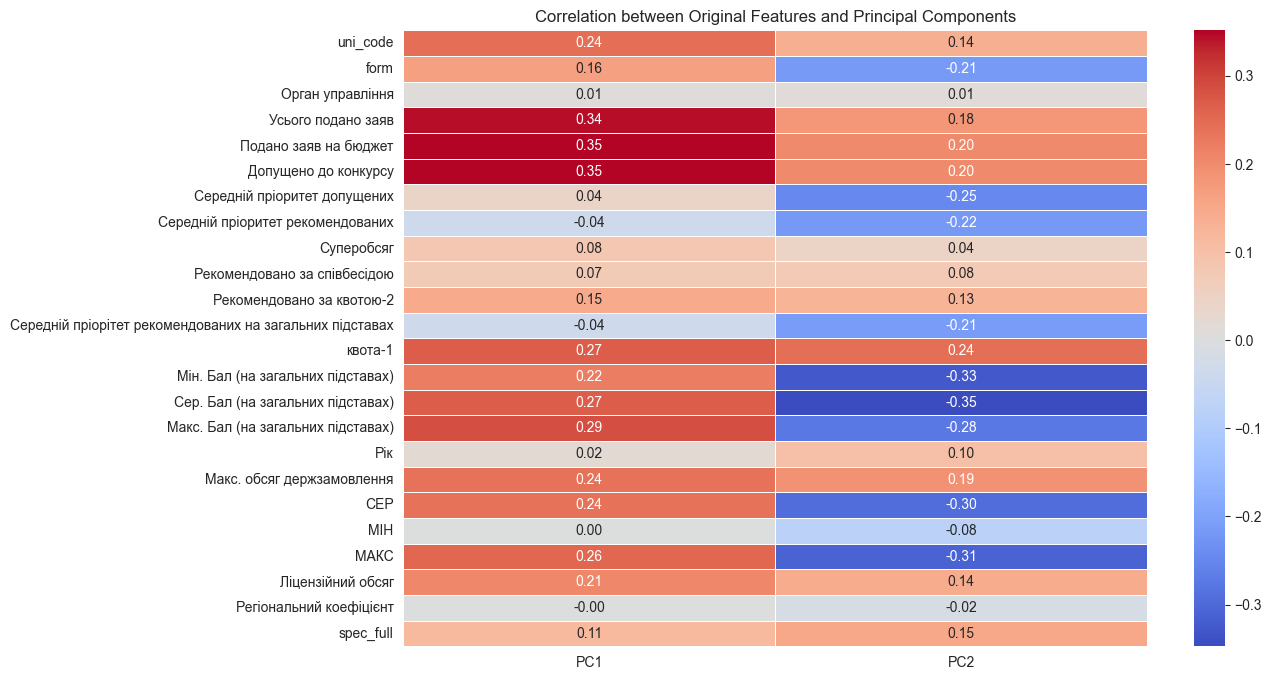

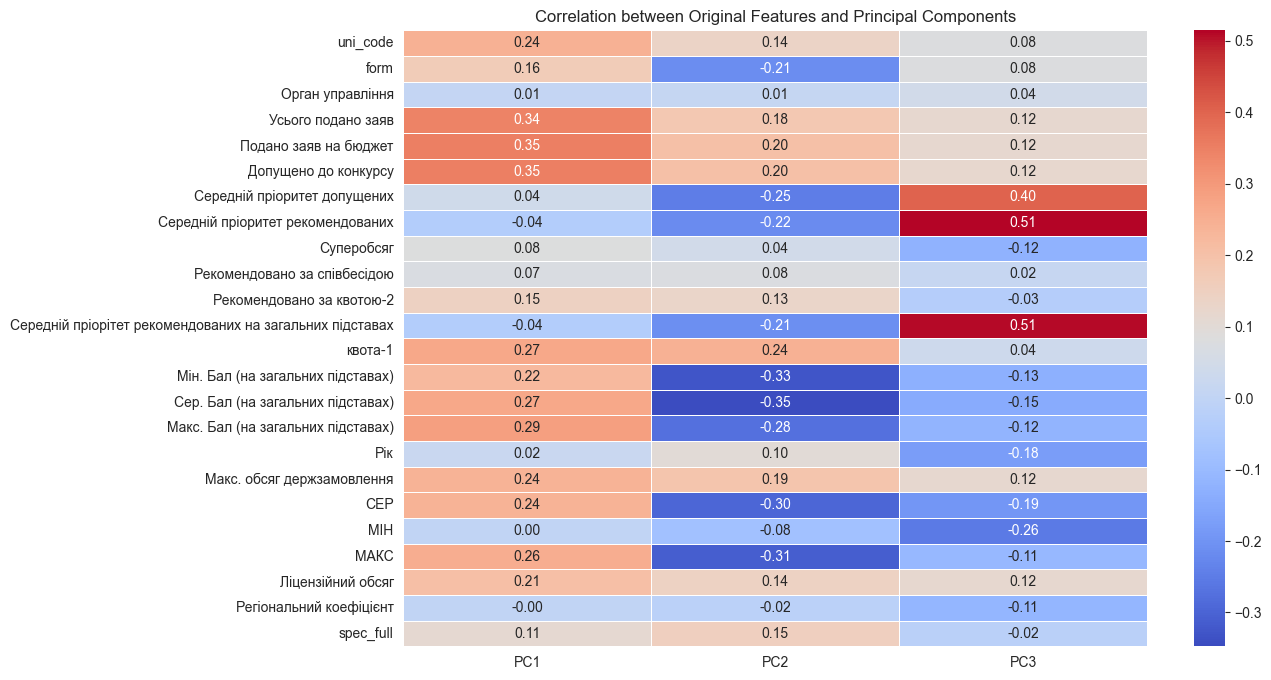

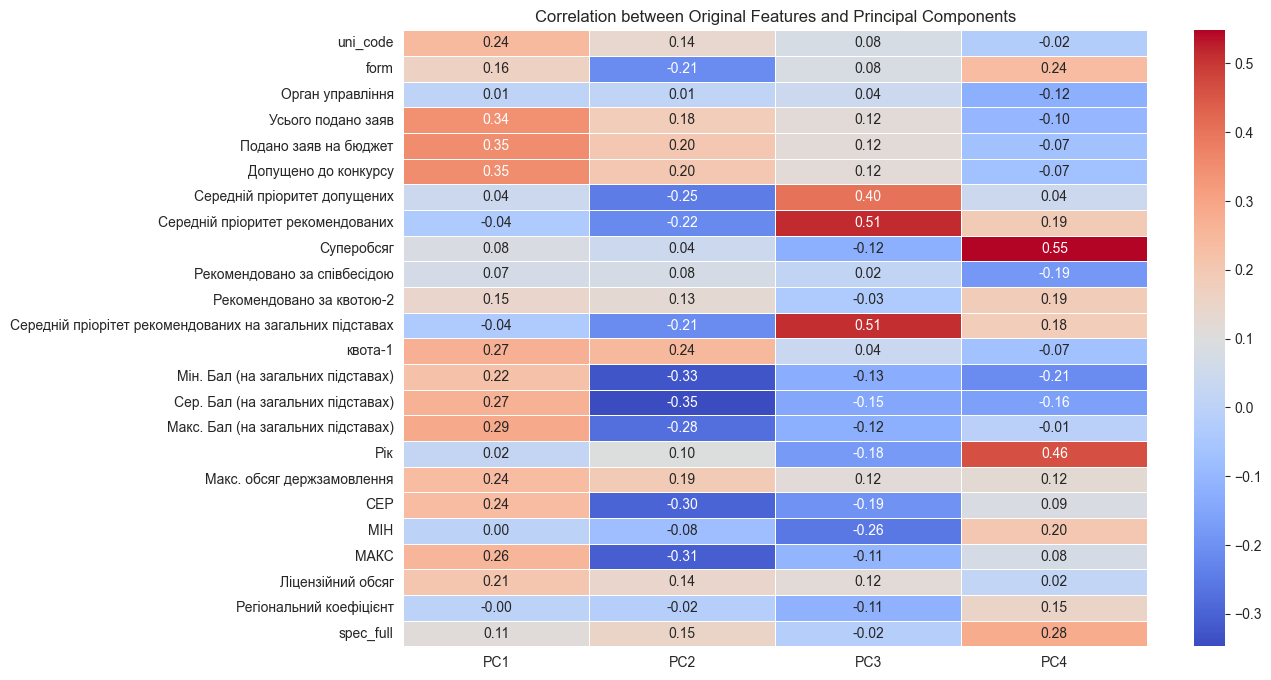

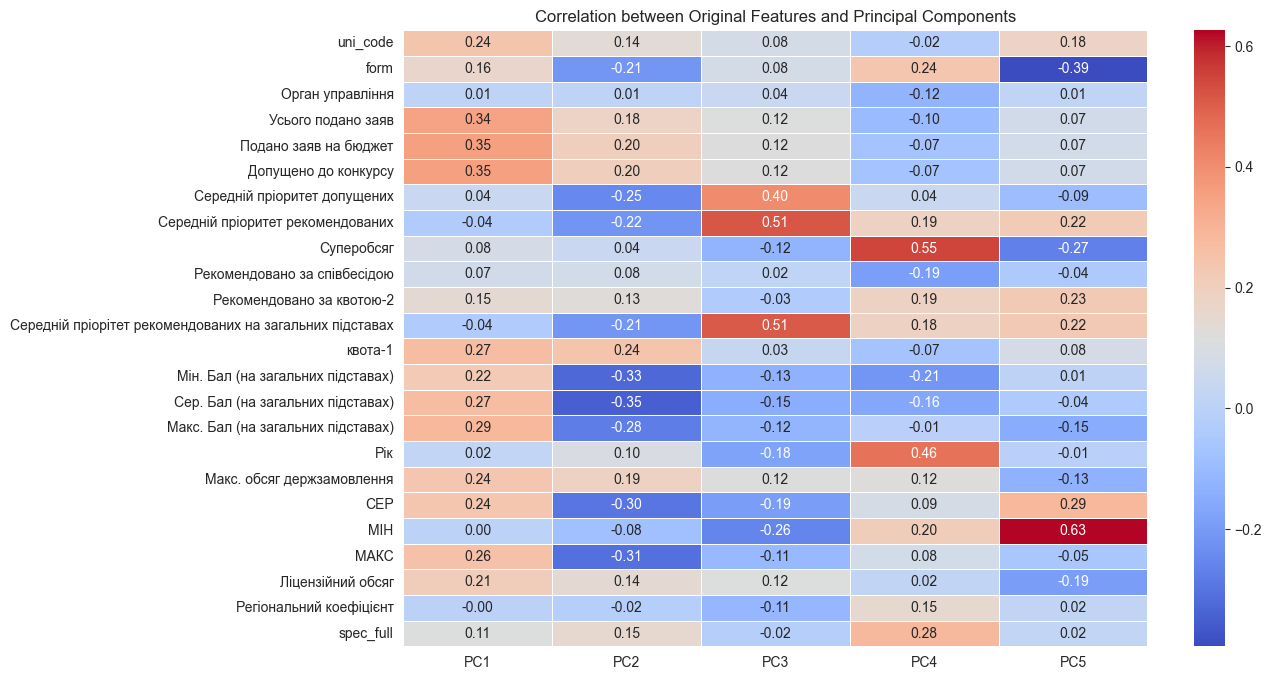

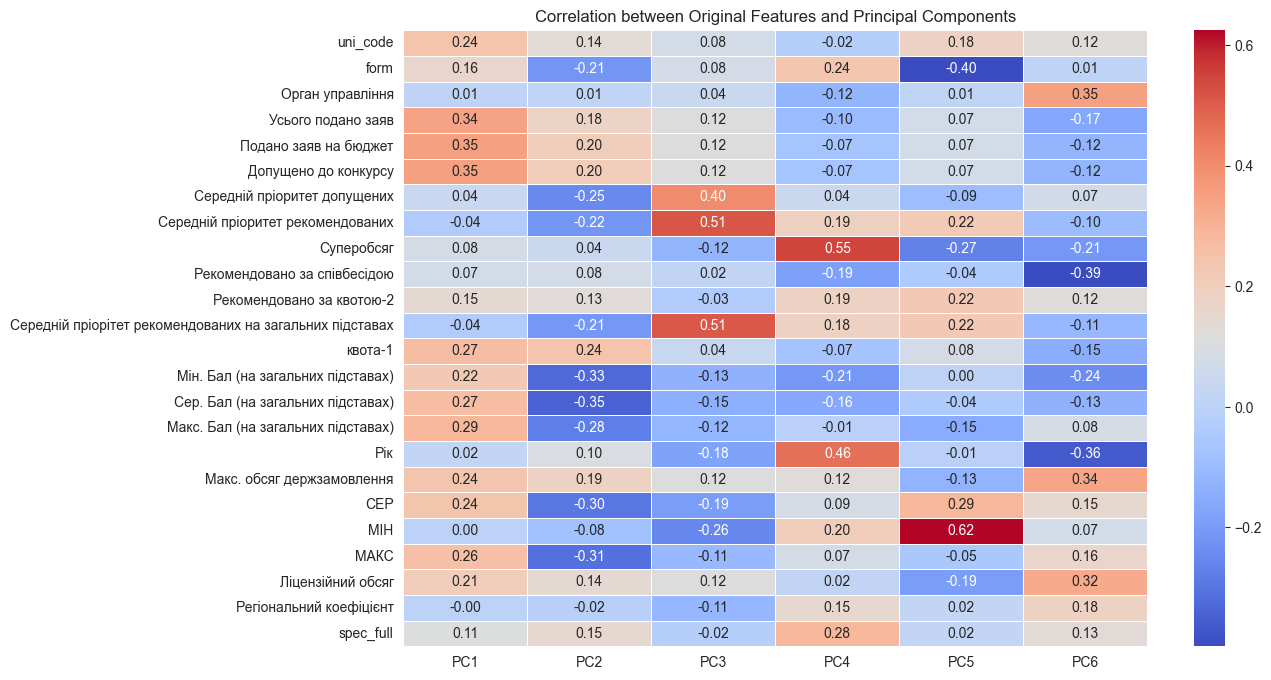

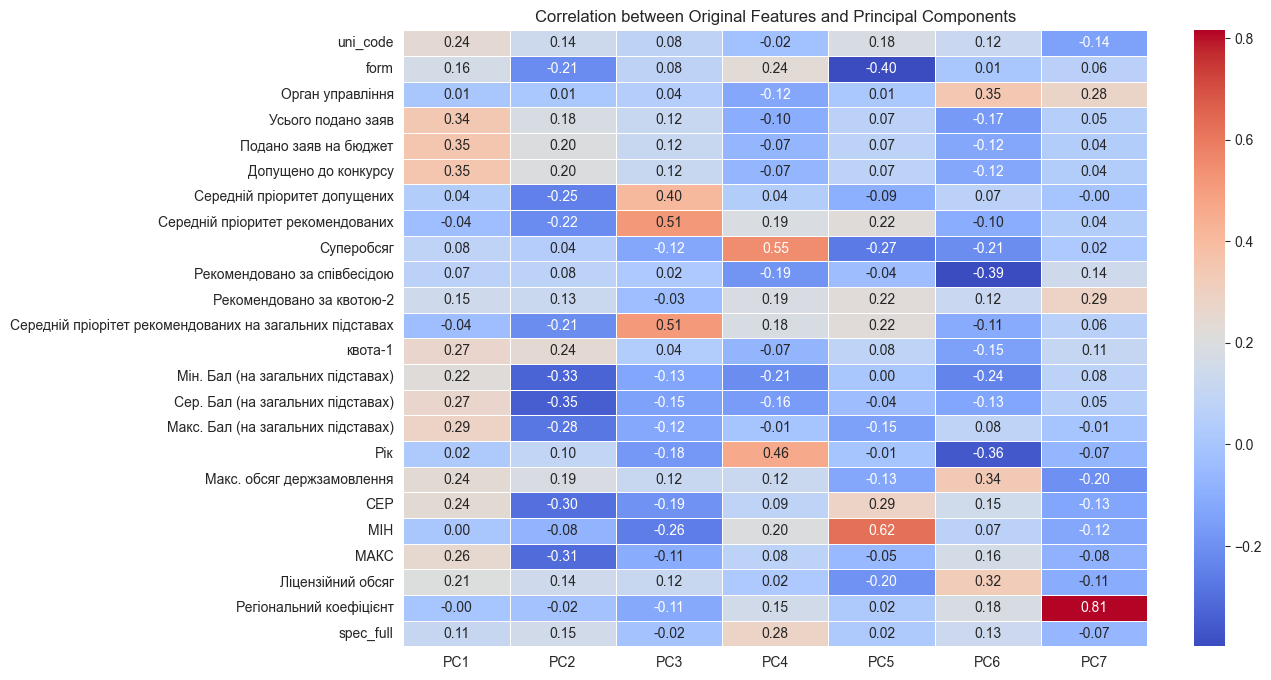

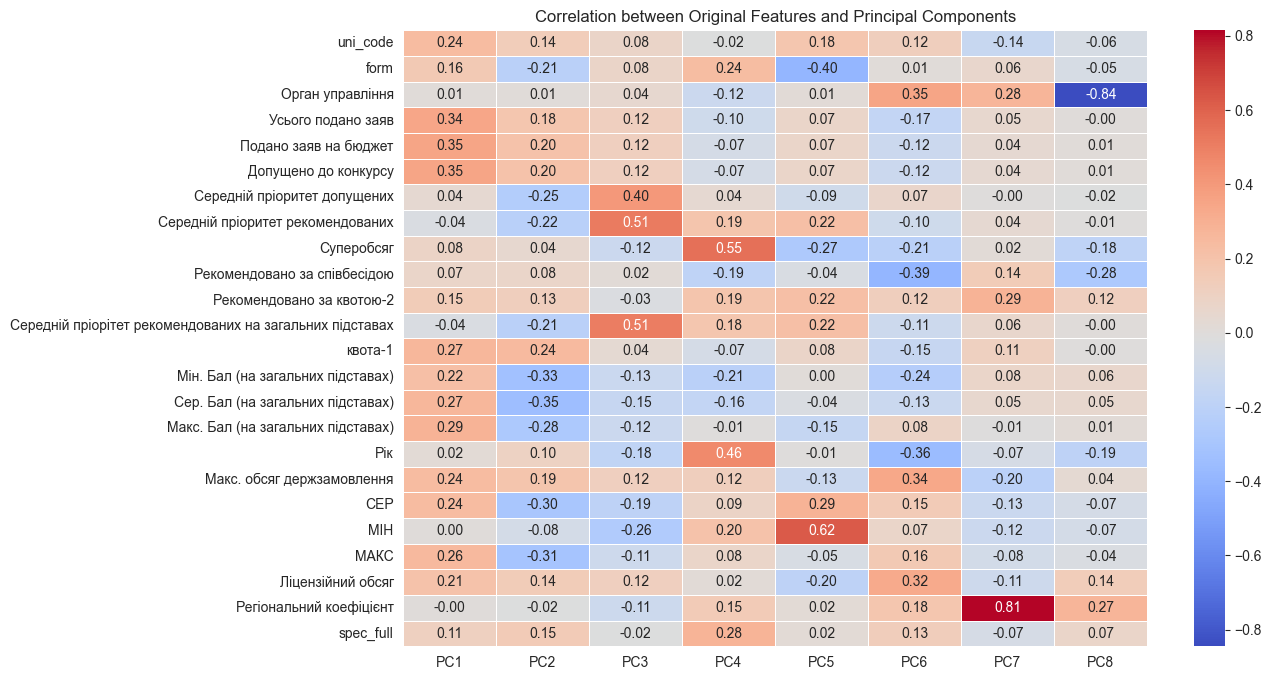

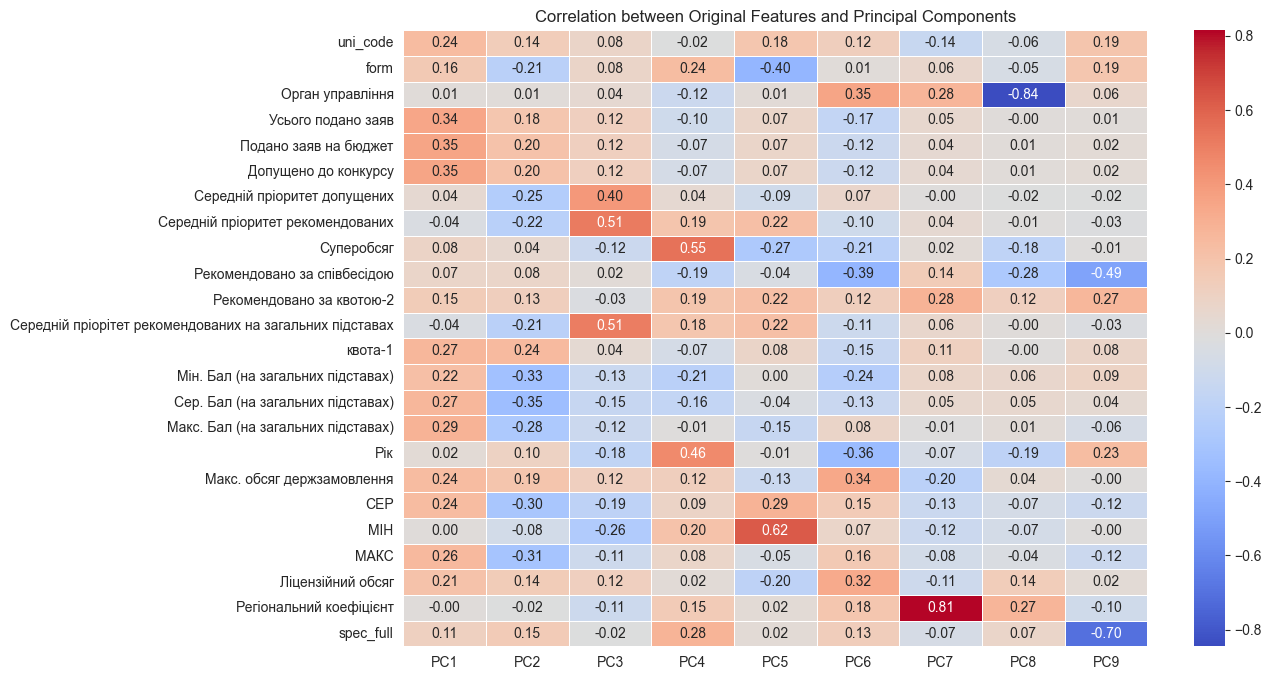

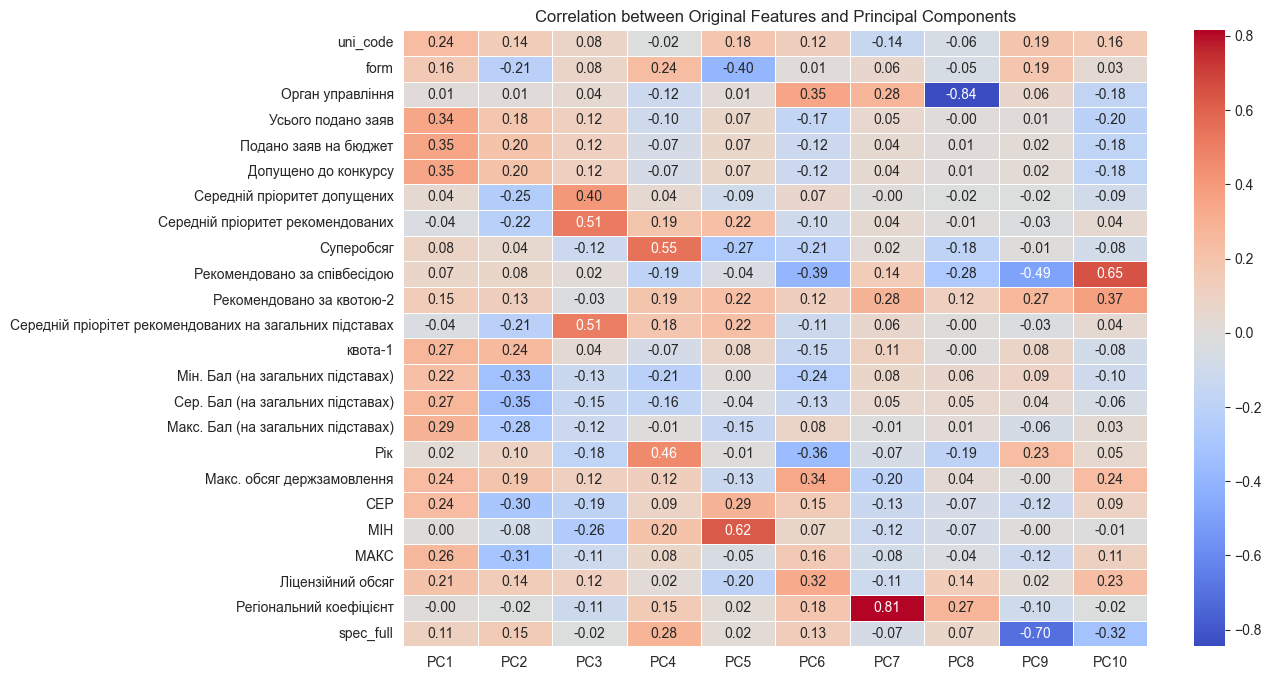

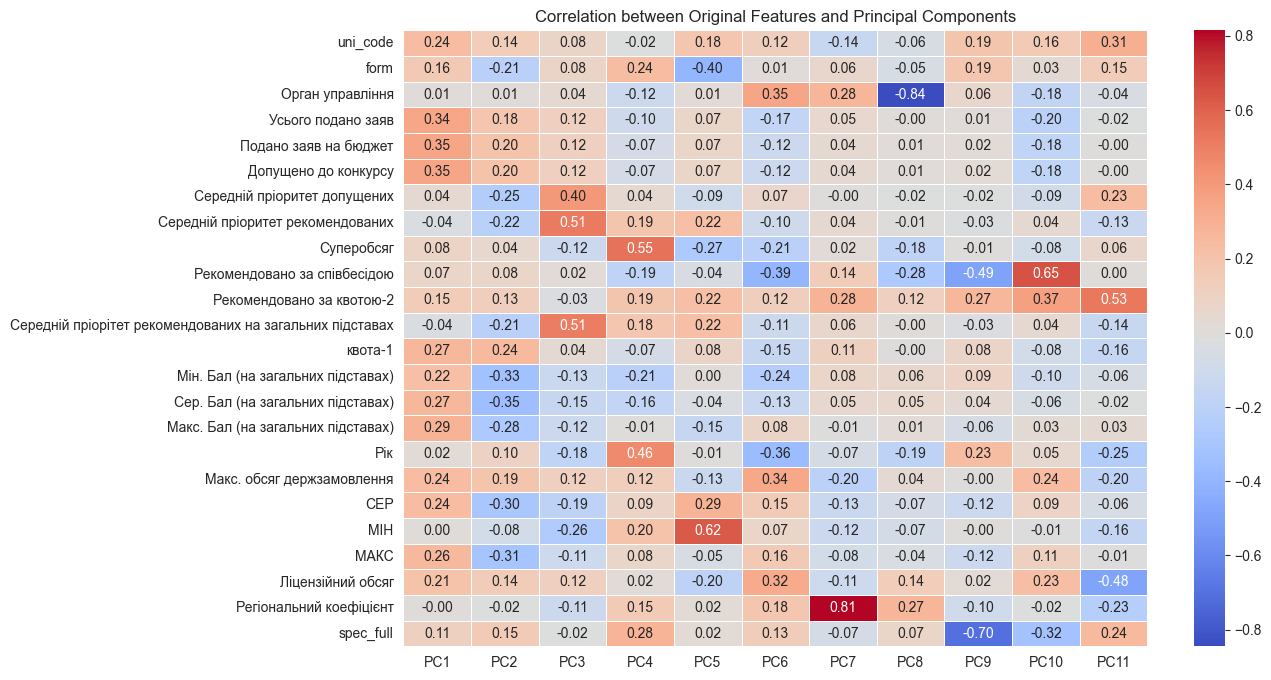

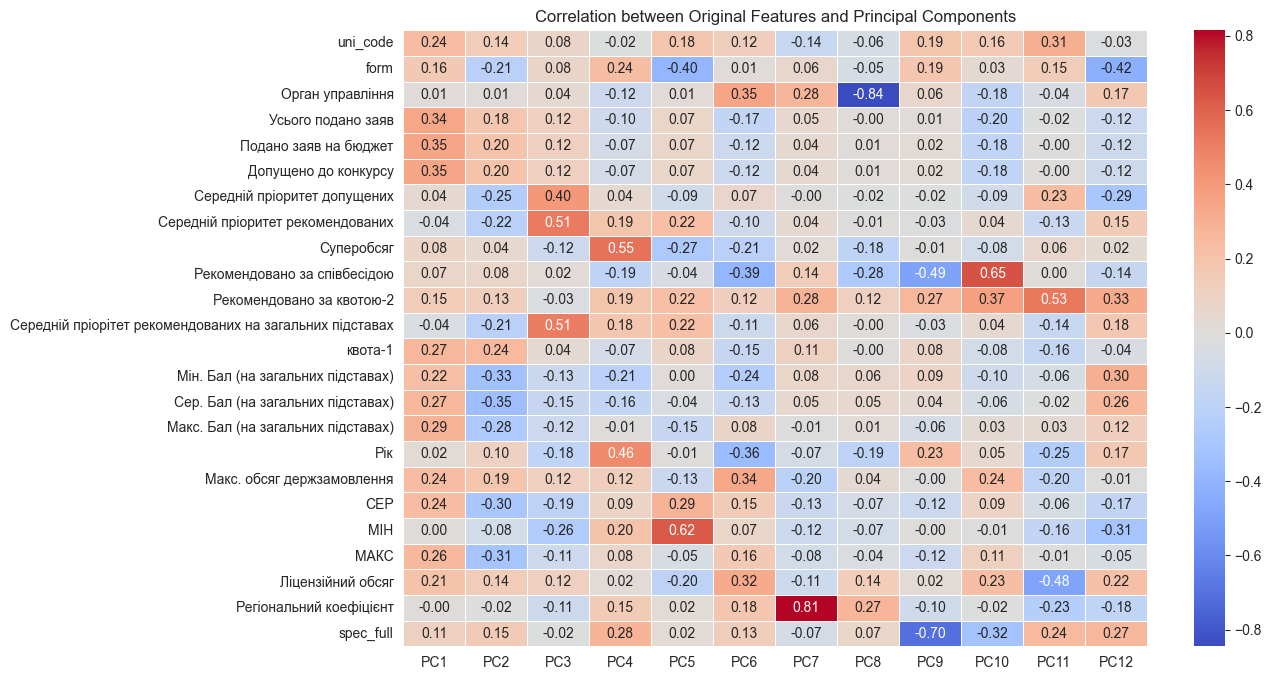

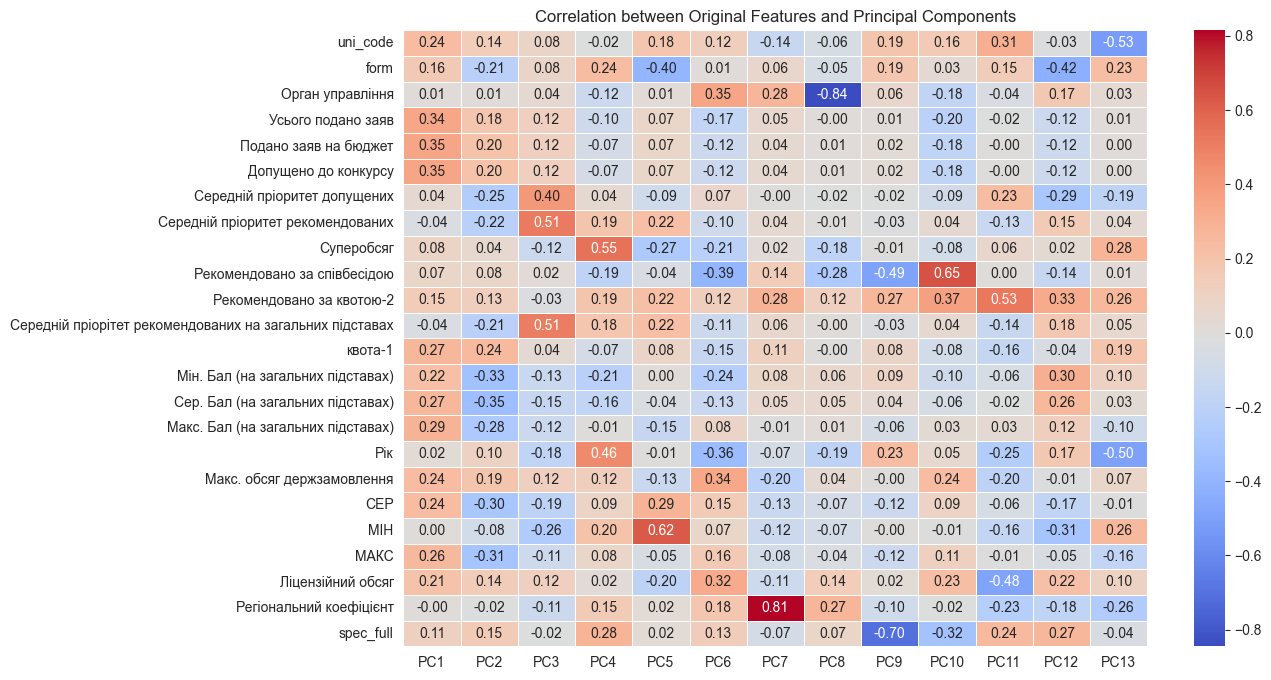

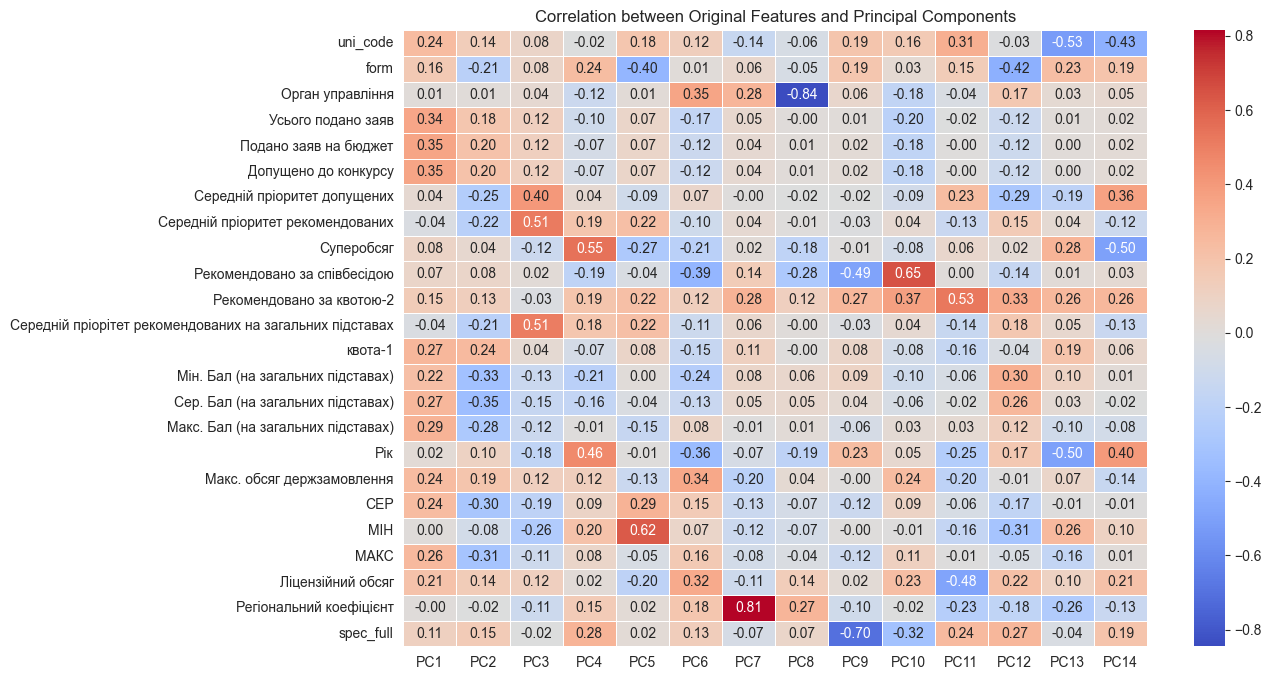

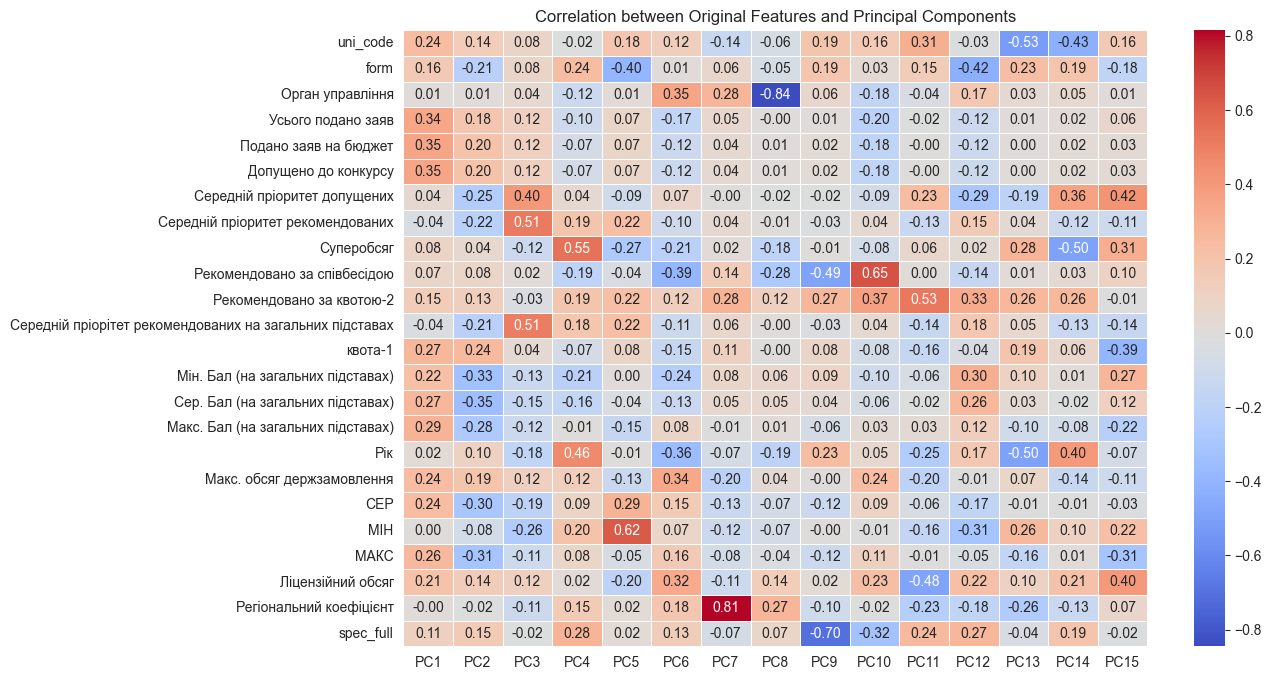

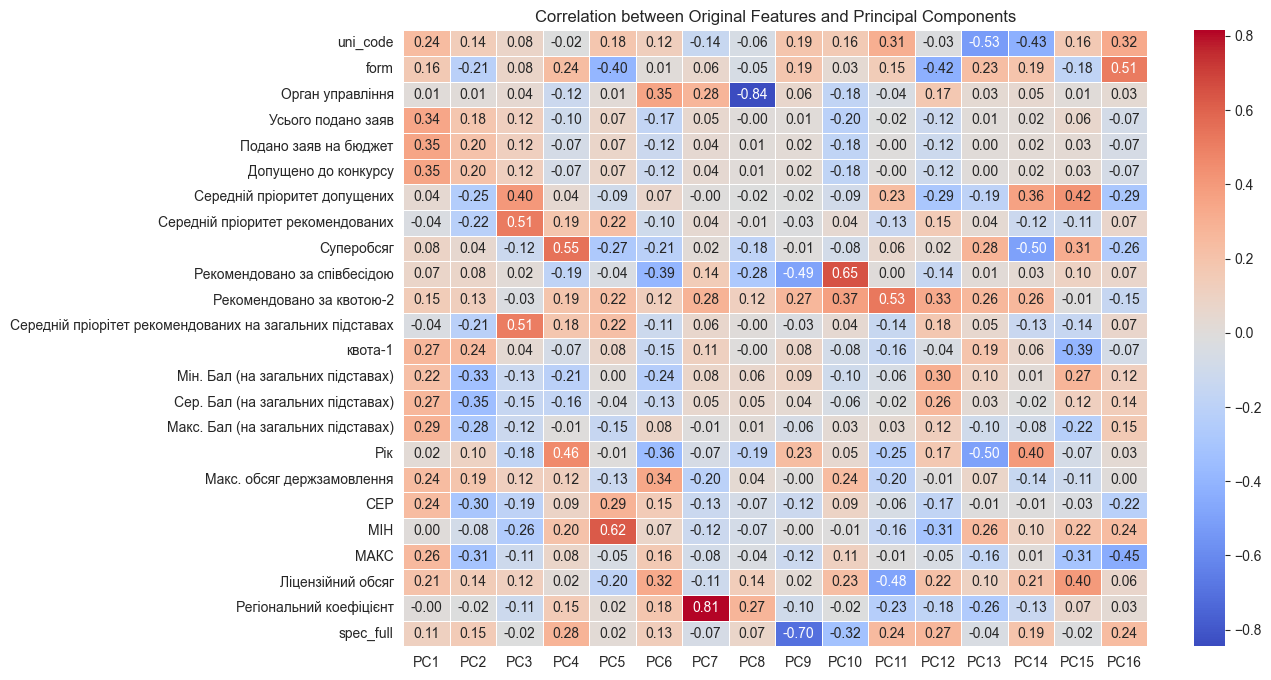

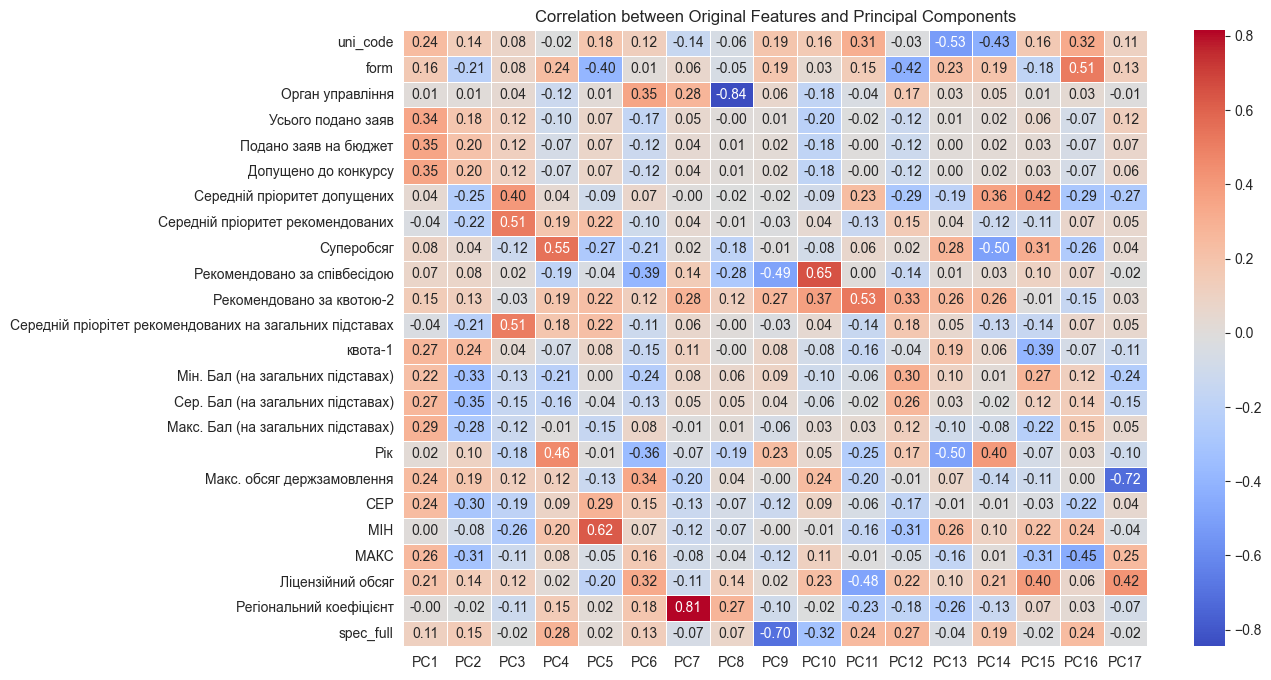

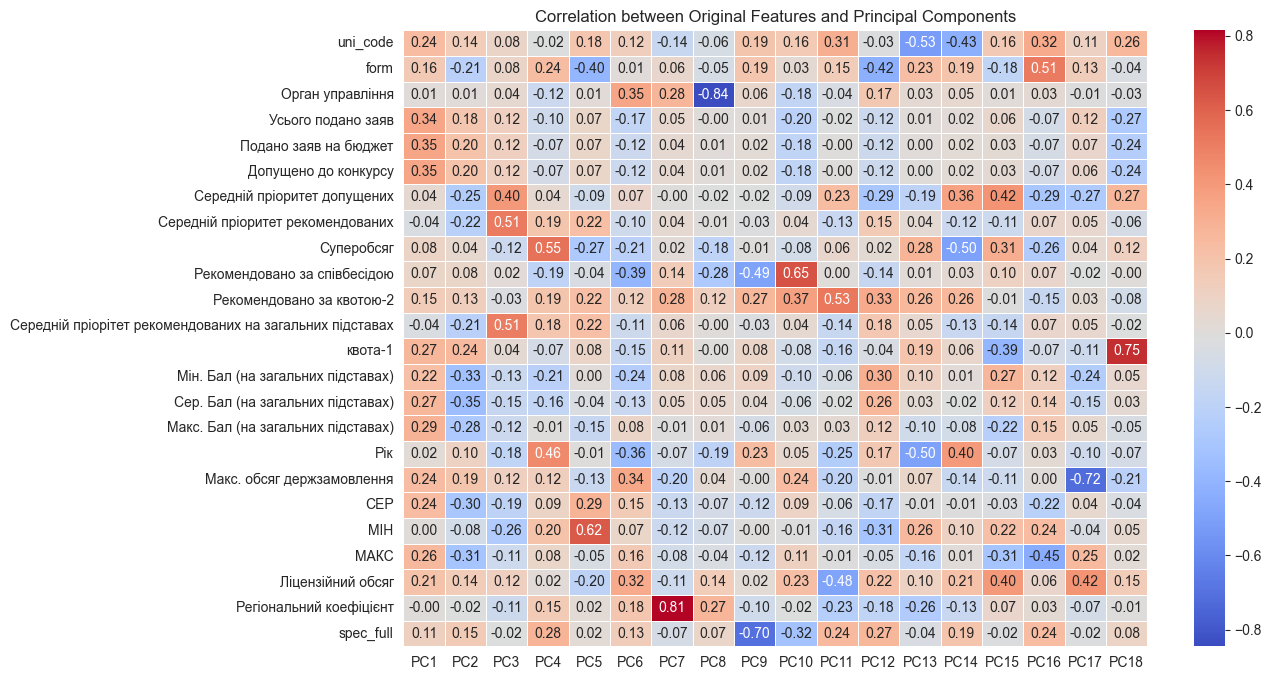

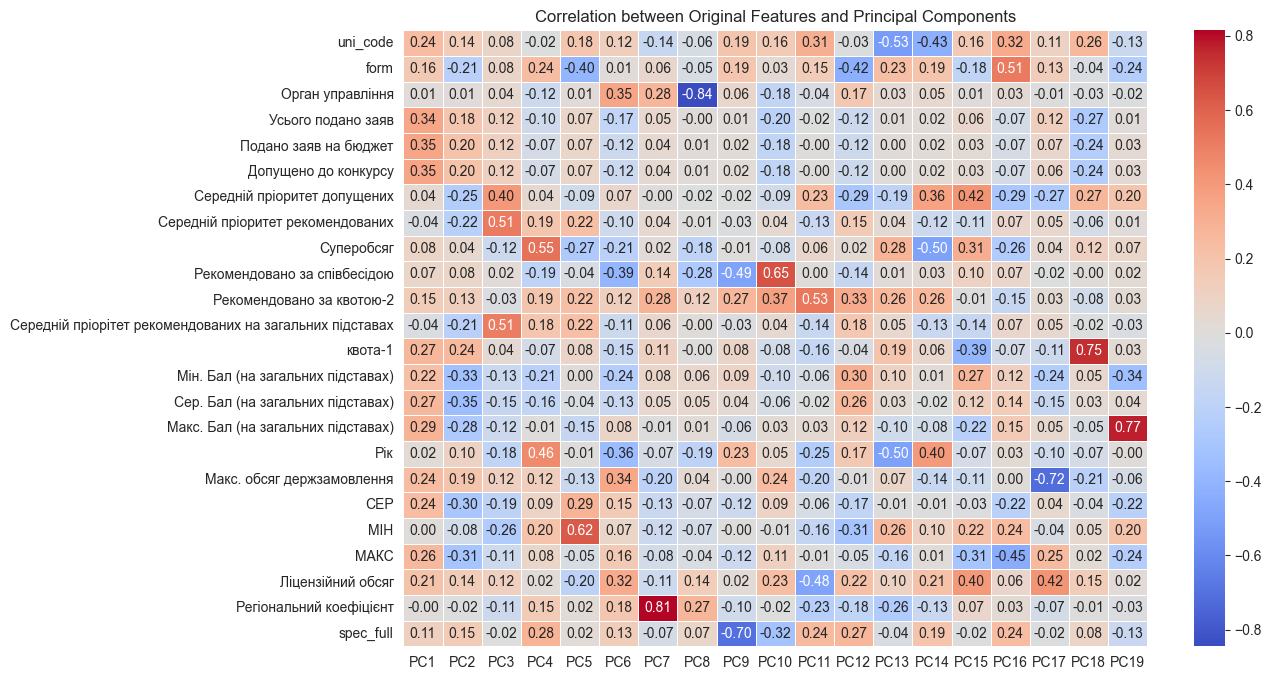

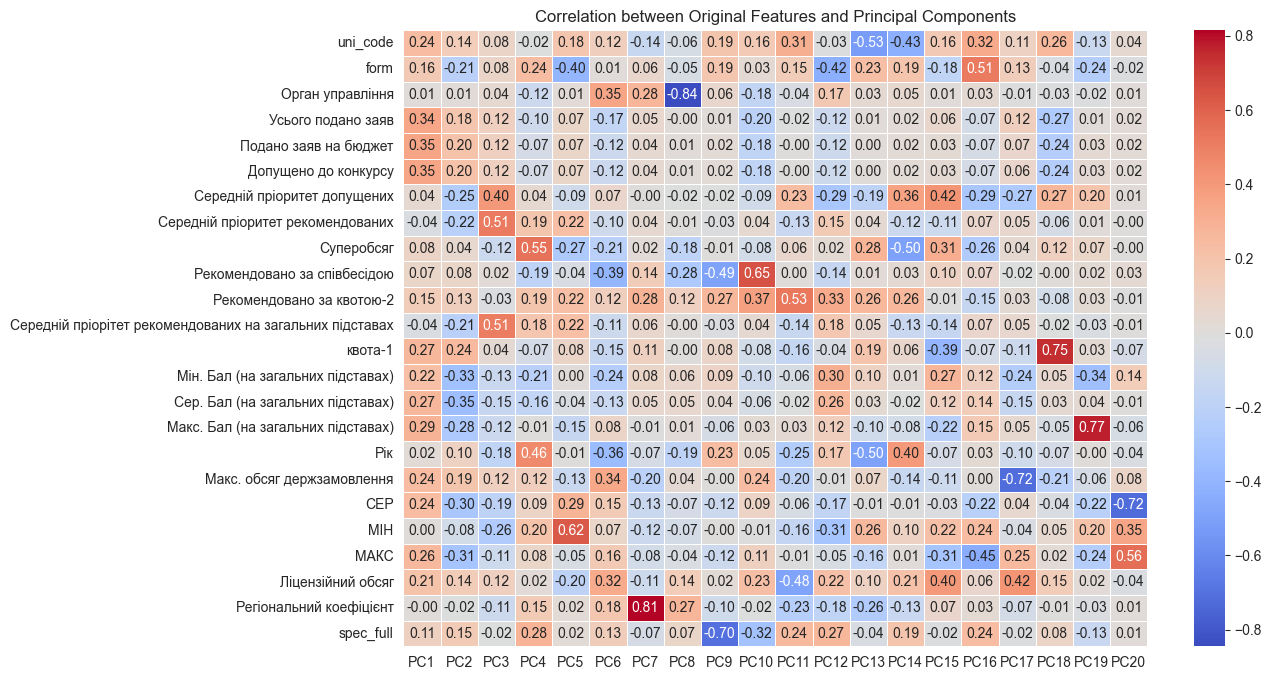

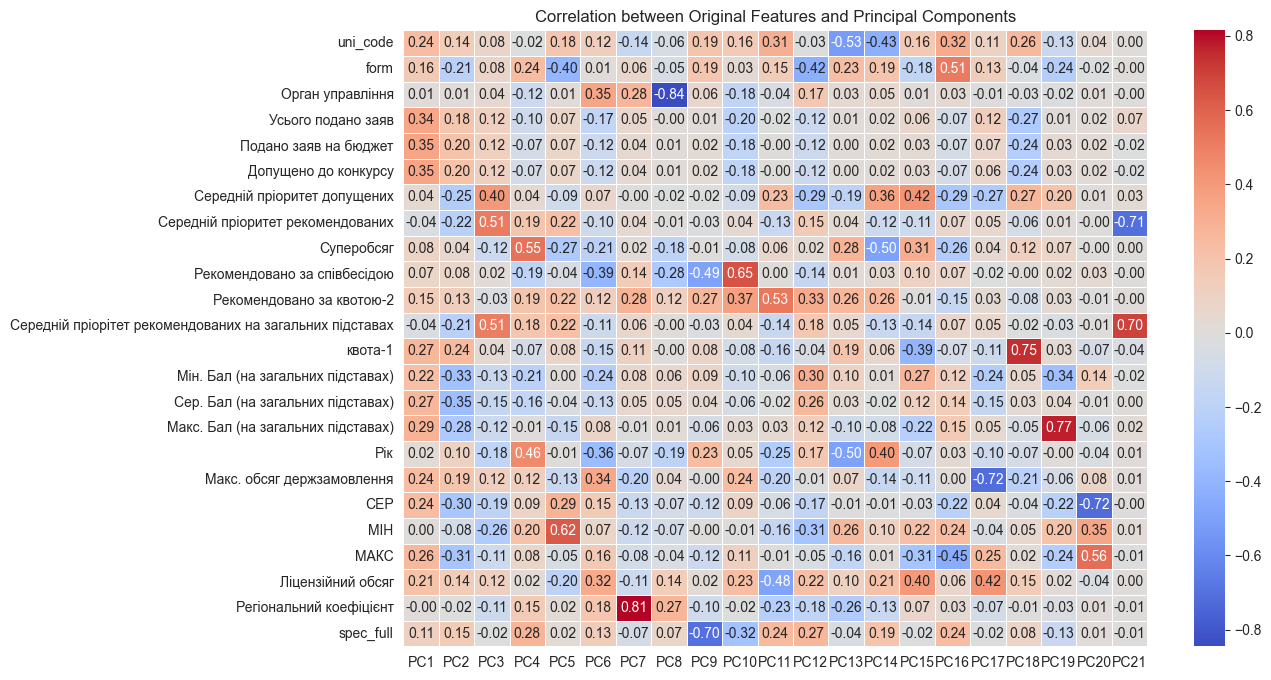

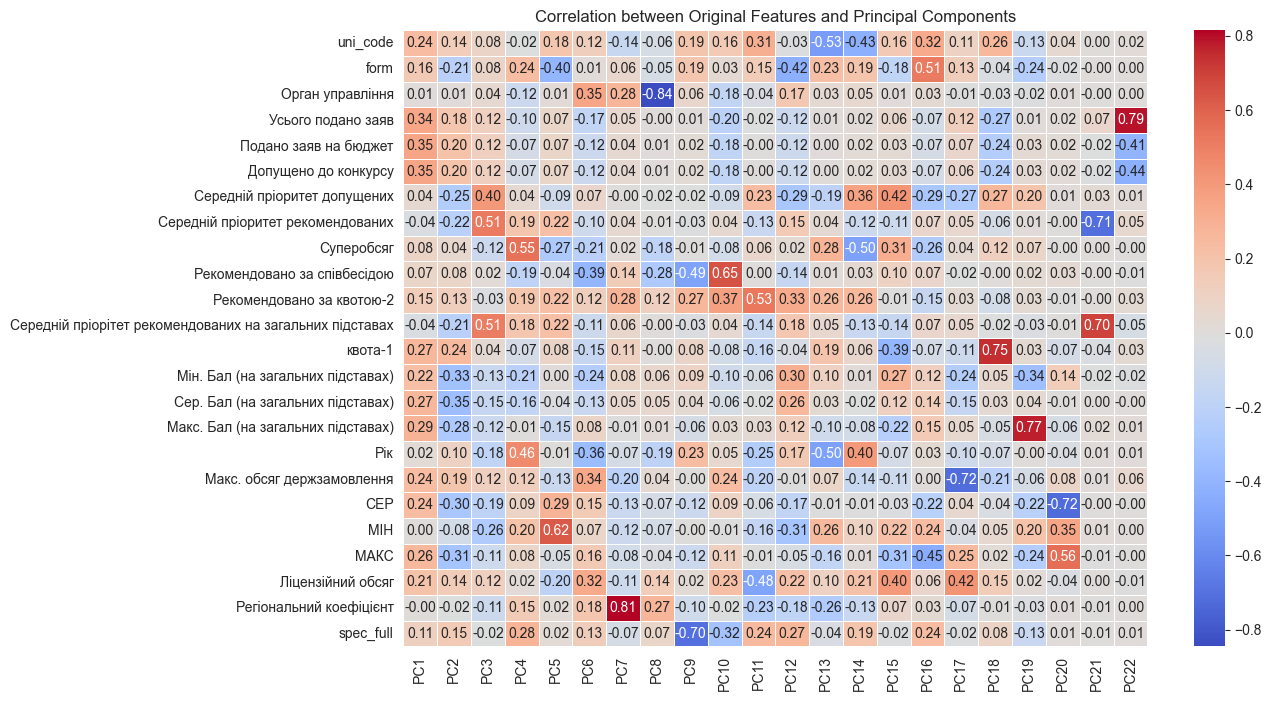

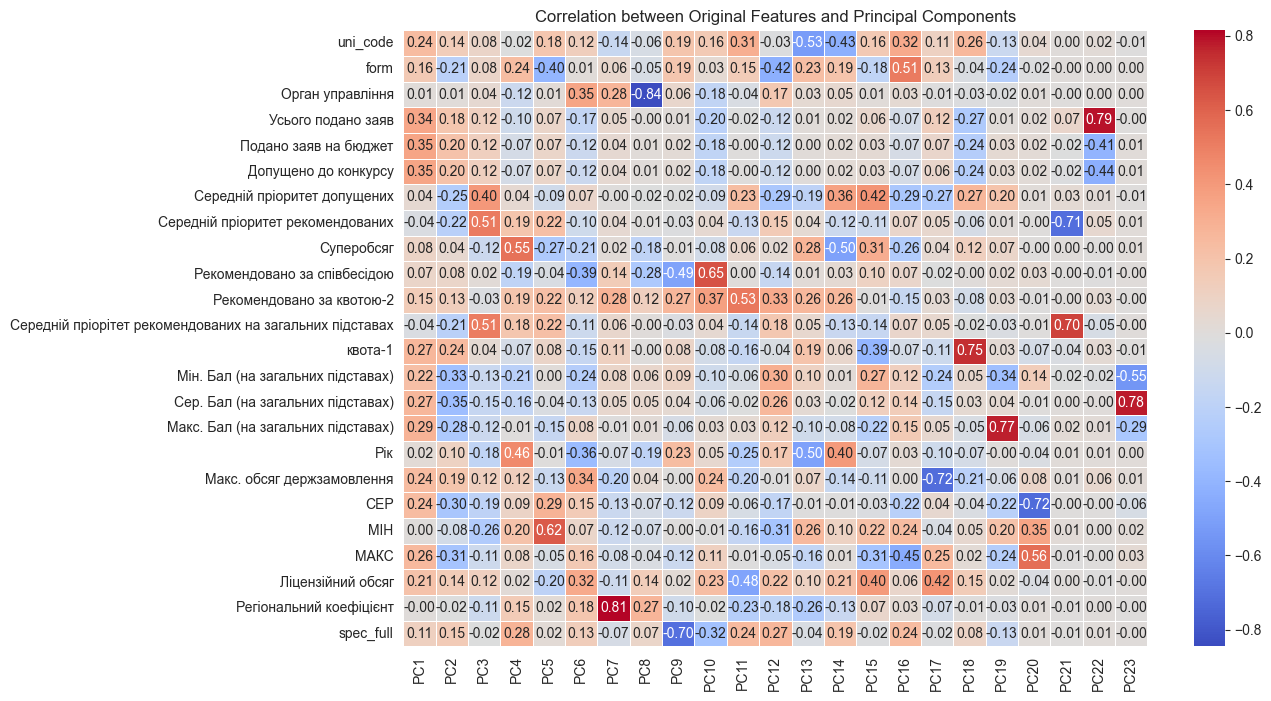

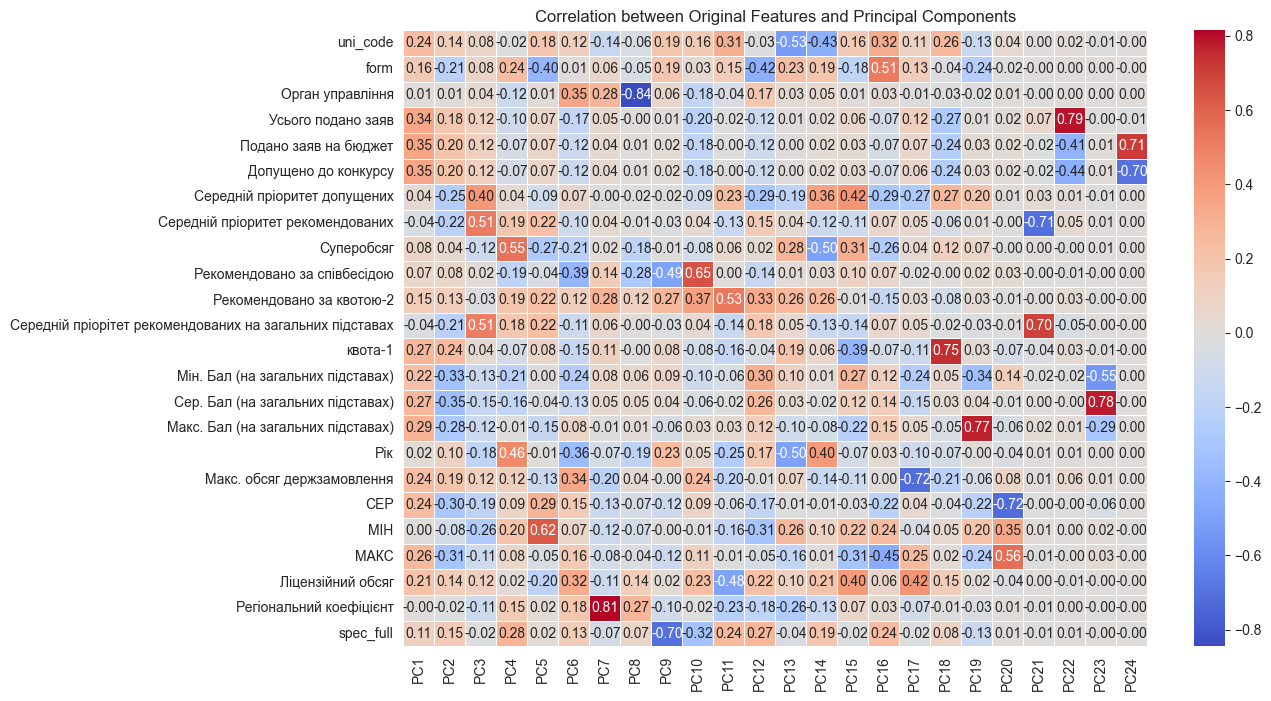

In [67]:
for n_components in range(1, 25):
    pca = PCA(n_components=n_components, random_state=1)
    pca.fit(X_train_std)

    loading_vectors = pca.components_

    loading_df = pd.DataFrame(loading_vectors.T, columns=[f'PC{i + 1}' for i in range(loading_vectors.shape[0])],
                              index=X_train.columns)

    plt.figure(figsize=(12, 8))
    sns.heatmap(loading_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    plt.title('Correlation between Original Features and Principal Components')
    plt.show()